# Dependencies

In [1]:
# Initial imports

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import sklearn.preprocessing as preprocessing

# Data cleaning and Preparation

In [2]:
# Read csv file
data = Path('Resources/crypto_data.csv')
cryptoData_df = pd.read_csv(data).copy()

# Drop Unnamed:0 column
cryptoData_df = cryptoData_df.drop(columns= 'Unnamed: 0')

In [3]:
print(cryptoData_df.columns.tolist())
cryptoData_df.head()

['CoinName', 'Algorithm', 'IsTrading', 'ProofType', 'TotalCoinsMined', 'TotalCoinSupply']


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Filter data by IsTrading = True and then drop IsTrading column
cryptoData_df = cryptoData_df[cryptoData_df['IsTrading'] == True]
cryptoData_df = cryptoData_df.drop(columns='IsTrading')
cryptoData_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
# Remove rows that has at least one NaN values
cryptoData_df.dropna(inplace=True)
cryptoData_df.isnull().sum()
print(f'Lenght of the dataframe: {len(cryptoData_df)}')

Lenght of the dataframe: 685


In [6]:
# Filter the data to only the cryptos that has been mined
cryptoData_df = cryptoData_df[cryptoData_df['TotalCoinsMined'] > 0]
print(f'Lenght of the dataframe after removing cryptos that have not been mined: {len(cryptoData_df)}')

Lenght of the dataframe after removing cryptos that have not been mined: 532


In [7]:
# Remove CoinName and transform Algorithm and ProofType to numerical values
crypto_df = cryptoData_df.drop(columns='CoinName').copy()
cryptoDummies_df = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
print(f'Number of rows: {len(crypto_df)} and number of columns {len(crypto_df.columns.tolist())} for the cryptoData_df')
print(f'Number of rows: {len(cryptoDummies_df)} and number of columns {len(cryptoDummies_df.columns.tolist())} for the cryptoDummies_df')

Number of rows: 532 and number of columns 4 for the cryptoData_df
Number of rows: 532 and number of columns 98 for the cryptoDummies_df


In [8]:
# create scaler and Standardize the dataset 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cryptoDummies_df)

# Dimensionality Reduction

In [9]:
# Initialize PCA model with 90% of the data
pca = PCA(n_components=0.9)

# Get principal components for the iris data.
scaled_pca = pca.fit_transform(scaled_data)

In [10]:
# Create a dataframe with the iris data
pca_df = pd.DataFrame(data=scaled_pca, index=cryptoDummies_df.index)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.734816e-12,-5.417255e-15,-1.223976e-16,-0.007129,-1.319756,-0.051813,...,7.930746e-17,1.066184e-15,2.929092e-15,-7.260564e-16,-1.958946e-15,1.858141e-15,-1.863509e-15,7.873066e-16,-1.846167e-18,-4.153611e-15
2,-0.318434,1.032331,-0.591126,0.001386,2.712386e-12,-5.575109e-15,-2.141355e-16,-0.007739,-1.322514,-0.056674,...,5.236227e-17,3.558103e-16,3.123007e-15,-5.243003e-17,-1.703046e-15,1.069014e-15,-1.856951e-15,1.174094e-15,5.251165e-16,-3.804973e-15
5,2.305468,1.656383,-0.683617,0.004731,9.322259e-12,-6.700325e-15,7.872127e-15,-0.054781,-1.542879,-0.943951,...,3.638111e-14,-1.841986e-14,-5.521324e-14,-7.303804e-14,2.329683e-14,-3.527460e-14,3.114482e-14,2.752079e-14,-2.364644e-14,2.844002e-14
7,-0.145184,-1.320593,0.192813,-0.001229,-2.420624e-12,2.357806e-15,-1.697979e-15,-0.002071,0.281463,0.251862,...,4.765898e-15,2.352318e-17,-2.522688e-14,6.604406e-15,-9.542520e-15,-1.391009e-14,2.591484e-15,2.225494e-15,4.614234e-15,4.660314e-15
8,-0.151768,-2.036192,0.396182,-0.001705,-3.352037e-12,2.706411e-15,-1.587523e-15,0.027735,0.519099,0.188820,...,-3.035501e-14,6.137487e-14,-3.172419e-14,-3.873903e-14,-7.522860e-14,-7.057959e-14,4.784940e-14,9.436182e-15,1.251016e-13,-3.544121e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.471251,0.822241,-0.071160,-0.008206,-1.632875e-11,-2.711489e-16,2.473714e-14,-0.851713,2.041159,3.560713,...,6.684700e-15,-3.061189e-15,-2.229751e-14,7.766080e-15,-1.101111e-14,-1.411705e-14,6.264833e-15,4.319524e-15,2.107777e-15,3.175551e-15
1242,-0.333144,1.032071,-0.590740,0.001399,2.739500e-12,-5.504781e-15,-1.453662e-16,-0.007154,-1.320125,-0.052460,...,3.692569e-16,9.833620e-16,2.767404e-15,-6.656252e-16,-1.742869e-15,1.734683e-15,-1.547654e-15,8.908817e-16,-1.034381e-16,-3.825012e-15
1245,0.324349,-2.312308,0.421515,-0.001319,-2.587411e-12,3.997274e-15,-3.487809e-15,0.017309,0.161077,-0.047787,...,6.026022e-14,-2.007744e-14,-4.398437e-15,7.478438e-14,-1.425238e-14,3.053233e-14,4.840763e-14,1.935789e-14,-8.678967e-15,-3.669176e-14
1246,-0.149364,-2.049336,0.412968,-0.001745,-3.429876e-12,4.424198e-15,-2.699327e-15,0.028954,0.544389,0.233373,...,-7.154097e-16,3.560882e-15,-1.737890e-15,2.785750e-15,-5.688399e-16,5.725577e-16,-2.042620e-15,-1.782551e-15,-2.035793e-16,-4.381608e-16


In [11]:
# Fetch features and how did it change
print(f'Number of features {len(cryptoDummies_df.columns.tolist())} for the cryptoDummies_df')
print(f'Number of features {len(pca_df.columns.tolist())} for the pca_df')

Number of features 98 for the cryptoDummies_df
Number of features 74 for the pca_df


In [12]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=200)
# Reduce dimensions
tsne_features = tsne.fit_transform(scaled_pca)
# Shape of the data set
tsne_features.shape

(532, 2)

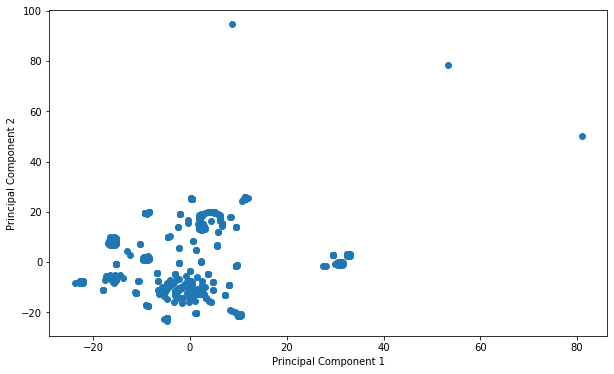

In [13]:
# Create dataframe to visualize the clusters
tsne_df = pd.DataFrame(data=tsne_features, columns=['Principal Component 1','Principal Component 2'])

plt.figure(figsize=(10,6))
plt.scatter(tsne_df['Principal Component 1'], tsne_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

There are at least 2 to 3 cluster after the tsne transformation

# Cluster Analysis with k-Means

In [14]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\Users\Rodrigo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,208142.906250
1,2,116996.460938
2,3,74196.437500
3,4,46522.207031
4,5,33208.937500
5,6,27514.501953
6,7,22654.300781
7,8,19936.285156
8,9,17053.458984
9,10,14535.426758


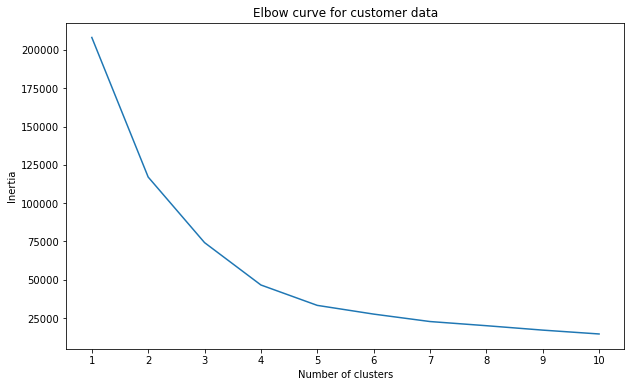

In [15]:
# Plot the elbow curve to find the best candidate(s) for k
plt.figure(figsize=(10,6))
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [16]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [17]:
clusters = get_clusters(4, tsne_df)
clusters

,Principal Component 1,Principal Component 2,class
0,2.445941,12.800918,2
1,6.058076,18.872759,2
2,10.666248,24.462273,2
3,31.414221,-1.054342,0
4,1.152720,-20.095621,3
...,...,...,...
527,28.050476,-1.428084,0
528,2.349439,19.089396,2
529,10.359928,-20.786289,3
530,-4.770638,-22.357996,3


In [18]:
def show_clusters(df):
    plt.scatter(df['Principal Component 1'], df['Principal Component 2'], c=df['class'])
    plt.xlabel('p[1]')
    plt.ylabel('p[2]')
    plt.show()

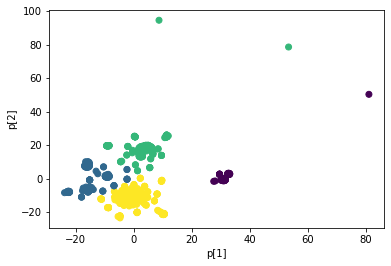

In [19]:
show_clusters(clusters)

#### From the graph, we can observe that the cryptos can be clustered into 4 different groups with 3 outliers. My recommendation would be to pick 2 cryptos from each cluster and monitore them to see which one perform the best. The ones that I would chose will be those with similar Total Coins Mined and Total Coin Supply. If there is a high demand with low coin supply, then the value of the crypto will skyrocket. 